In [2]:
# for fetching datasets
from ucimlrepo import fetch_ucirepo 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

# the custom model
from test_class import PRKNeighborsClassifier

from figure_helpers import generate_score_plot


In [3]:
# for sampling
RANDOM_STATE = 33

In [4]:
uciml_repos_name_id_dict = {
    "Banknote": 267,
    "Glass": 42,
    "Ionosphere": 52,
    "Wine": 109,
    "Parkisons": 174,
    "Sonar": 151,
    "Haberman": 43,
    "Page blocks": 78,
    "Letter recognition": 59,
    "Ecoli": 39,
    "Optical digits": 80,
    "Pen digits": 81,
    "Transfusion": 176,
    "Musk2": 75
}

/home/jt/projects/healthcare_data_predict_stay/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/home/jt/projects/healthcare_data_predict_stay/prknn_helpers.py:81: RuntimeWarning: invalid value encountered in scalar divide
  return total_sum / total_size
/home/jt/projects/healthcare_data_predict_stay/prknn_helpers.py:81: RuntimeWarning: invalid value encountered in scalar divide
  return total_sum / total_size
/home/jt/projects/healthcare_data_predict_stay/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/home/jt/projects/healthcare_data_predict_stay/prknn_helpers.py:81: RuntimeWarning: invalid value encountered in scalar divide
  return total_sum / total_size
/home/jt/projects/healthcare_data_predict_stay/prknn_help

ValueError: could not convert string to float: 'b'

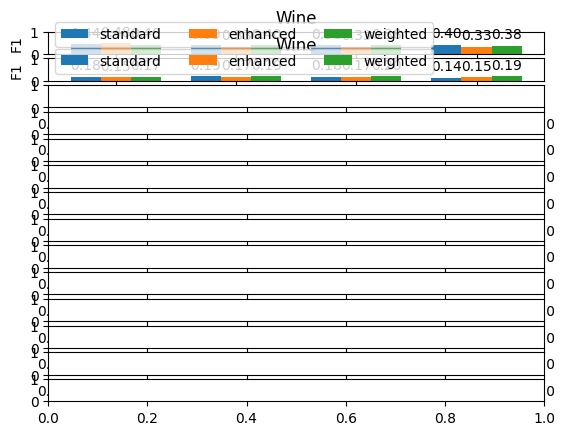

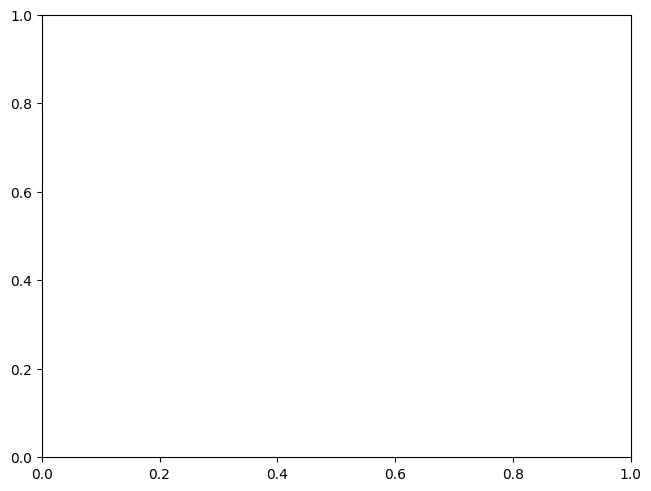

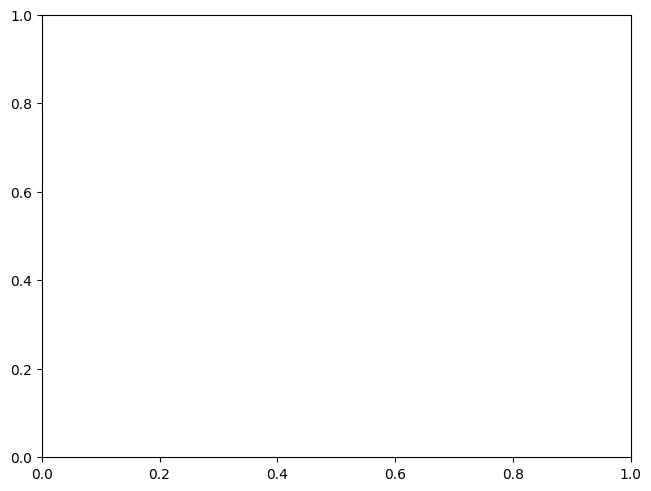

In [10]:
fig, ax = plt.subplots(14)

axs = ax.ravel()

k_values = [5, 15, 30, 45]

scoring = ('f1_macro', 'accuracy')


for i, dataset_name_id in enumerate(uciml_repos_name_id_dict.items()):

    dataset_name, id = dataset_name_id

    # fetching the data
    dataset = fetch_ucirepo(id=id)
    X = dataset.data.features
    y = dataset.data.targets

    # TODO: remove after testing loops
    X = X.sample(50)
    y = y.sample(50)

    # fit with k_values and plot reslts
    y=np.ravel(y)

    mnmx_scaler = MinMaxScaler()
    X = mnmx_scaler.fit_transform(X)

    standard_scores = []
    weighted_scores = []
    enhanced_scores = []

    for k in k_values:
        
        pr_knn_standard = PRKNeighborsClassifier(
            pr_version='standard',
            base_knn_params={"n_neighbors": k}
            ).fit(X, y)
        
        pr_knn_weighted = PRKNeighborsClassifier(
            pr_version='weighted',
            base_knn_params={"n_neighbors": k}
            ).fit(X,y)
        
        pr_knn_enhanced = PRKNeighborsClassifier(
            pr_version='enhanced',
            base_knn_params={"n_neighbors": k}
            ).fit(X,y)

        standard_scores.append(
                cross_validate(
                estimator=pr_knn_standard,
                X=X,
                y=y,
                scoring=scoring,
                cv=10
                )
            )
        
        weighted_scores.append(
                cross_validate(
                estimator=pr_knn_weighted,
                X=X,
                y=y,
                scoring=scoring,
                cv=10
                )
        )

        enhanced_scores.append(
                cross_validate(
                estimator=pr_knn_enhanced,
                X=X,
                y=y,
                scoring=scoring,
                cv=10
                )
        )

    scores = {}

    scores["standard"] = np.array([d['test_f1_macro'] for d in standard_scores])
    scores["enhanced"] = np.array([d['test_f1_macro'] for d in enhanced_scores])
    scores["weighted"] = np.array([d['test_f1_macro'] for d in weighted_scores])

    # plotting the averages
    x = np.arange(len(k_values))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    generate_score_plot(
        scores=scores,
        metric= "F1",
        k_values=k_values,
        dataset_name="Wine",
        ax=axs[i]
)
